In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("car_evaluation.csv")

In [3]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
df.columns=["buying", "maint", "doors", "persons", "lug_boot", "safety", "target"]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   target    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [8]:
for col in df.columns:
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
target
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [9]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
target      0
dtype: int64

In [10]:
#We need to convert string '5more' to int 5.
df["doors"].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [11]:
df["doors"]=df["doors"].str.replace("5more","5")

In [12]:
df["doors"].unique()

array(['2', '3', '4', '5'], dtype=object)

In [13]:
df["doors"]=df["doors"].astype(int)

In [14]:
df["doors"].unique()

array([2, 3, 4, 5])

In [15]:
df["persons"].unique()

array(['2', '4', 'more'], dtype=object)

In [16]:
df['persons'] = df['persons'].replace('more', '6')

In [17]:
df['persons']=df['persons'].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   int64 
 3   persons   1727 non-null   int64 
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   target    1727 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


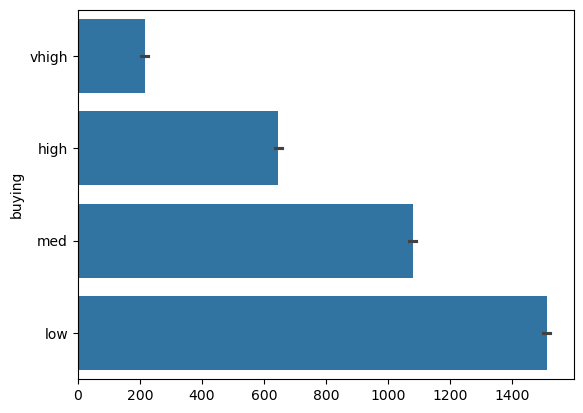

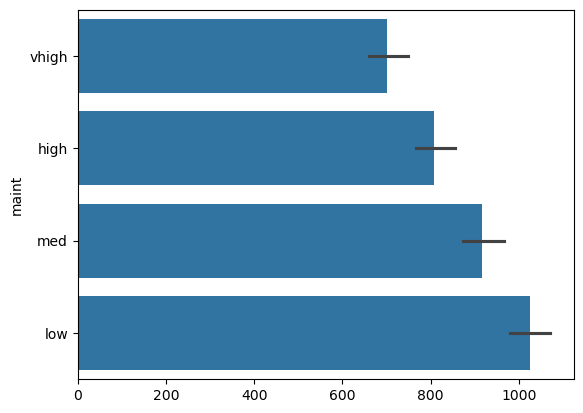

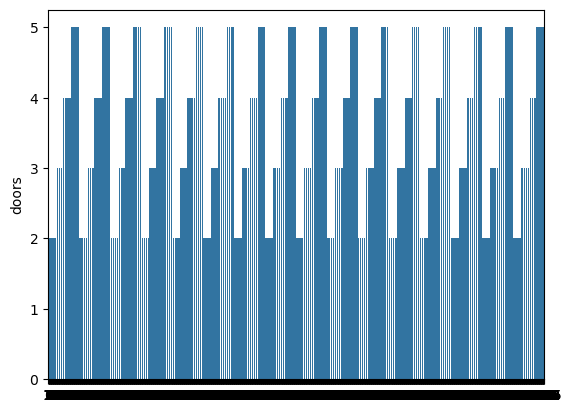

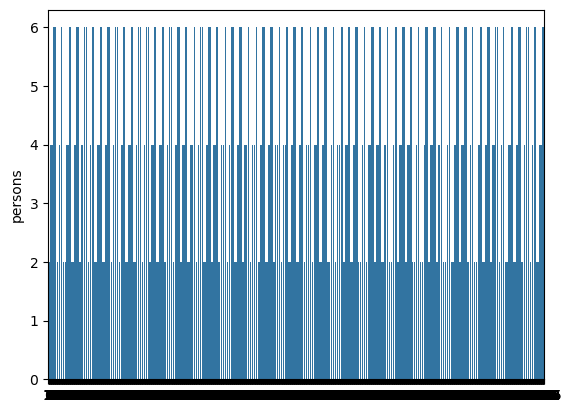

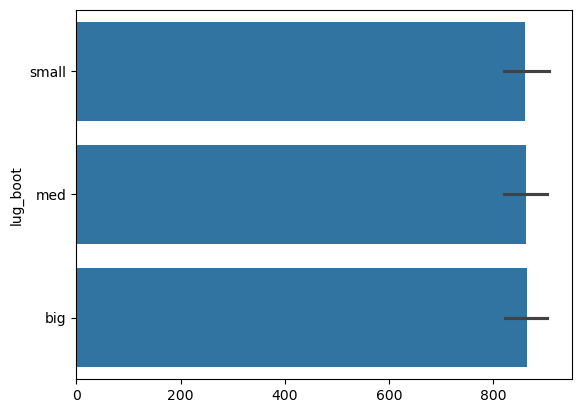

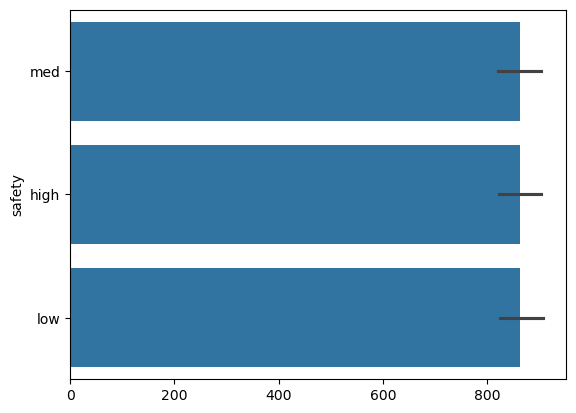

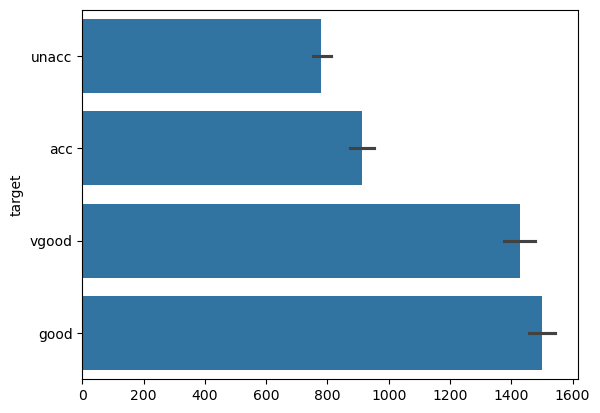

In [19]:
for column in df.columns:
    sns.barplot(df[column])
    plt.show()

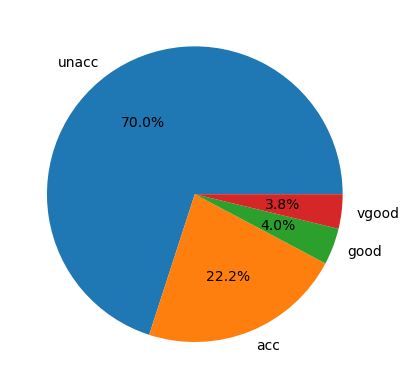

In [20]:
plt.pie(x=df["target"].value_counts(),labels=df["target"].value_counts().index,autopct='%1.1f%%')
plt.show()

In [21]:
X=df.drop("target",axis=1)
y=df["target"]

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=15)

In [23]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [24]:
categorical_cols = ["buying", "maint", "lug_boot", "safety"]
numerical_cols = ["doors", "persons"]

ordinal_encoder = OrdinalEncoder(categories = [
    ["low", "med", "high", "vhigh"], #buying
    ["low", "med", "high", "vhigh"], #maint
    ["small", "med", "big"], #lug_boot
    ["low", "med", "high"] #safety
])

preprocessor = ColumnTransformer( transformers= [
    ('transformers_robots_in_disguise', ordinal_encoder, categorical_cols),
], remainder="passthrough")

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
tree_model = DecisionTreeClassifier(max_depth=3, random_state=0)

tree_model.fit(X_train_transformed, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [27]:
y_pred = tree_model.predict(X_test_transformed)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

0.7861271676300579
              precision    recall  f1-score   support

         acc       0.54      0.51      0.53       121
        good       0.00      0.00      0.00        21
       unacc       0.85      0.97      0.91       356
       vgood       0.00      0.00      0.00        21

    accuracy                           0.79       519
   macro avg       0.35      0.37      0.36       519
weighted avg       0.71      0.79      0.75       519



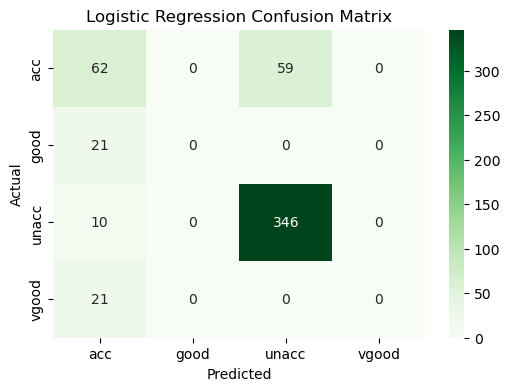

In [29]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens',
           xticklabels=["acc","good","unacc","vgood"],
           yticklabels=["acc","good","unacc","vgood"])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


[Text(0.3333333333333333, 0.875, 'persons <= 3.0\ngini = 0.451\nsamples = 1208\nvalue = [263, 48, 853, 44]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 409\nvalue = [0, 0, 409, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'safety <= 0.5\ngini = 0.576\nsamples = 799\nvalue = [263, 48, 444, 44]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 269\nvalue = [0, 0, 269, 0]'),
 Text(0.6666666666666666, 0.375, 'buying <= 1.5\ngini = 0.63\nsamples = 530\nvalue = [263, 48, 175, 44]'),
 Text(0.5, 0.125, 'gini = 0.647\nsamples = 270\nvalue = [142, 48, 36, 44]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.498\nsamples = 260\nvalue = [121, 0, 139, 0]')]

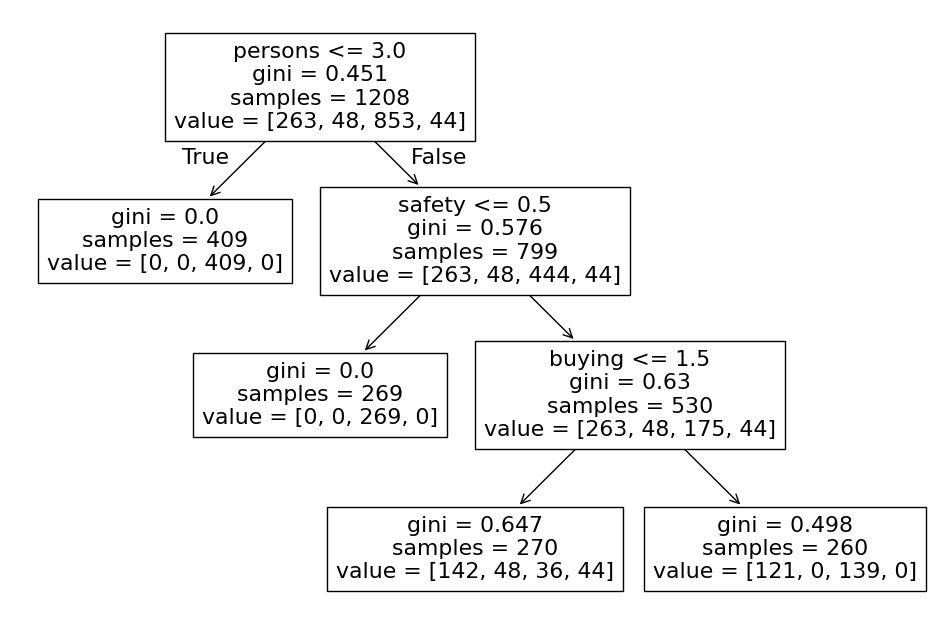

In [30]:
plt.figure(figsize=(12,8))
from sklearn import tree
column_names = categorical_cols + numerical_cols
tree.plot_tree(tree_model.fit(X_train_transformed, y_train),feature_names=column_names)

In [31]:
#hyperparameter tuning
param = {
    "criterion" : ["gini", "entropy", "log_loss"],
    "splitter" : ["best", "random"],
    "max_depth" : [1,2,3,4,5,15,None],
    "max_features" : ["sqrt", "log2", None]
}

In [32]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=param, cv=5,scoring="accuracy")

In [40]:
grid.fit(X_train_transformed, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 15, None],
                         'max_features': ['sqrt', 'log2', None],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [41]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': None,
 'splitter': 'best'}

In [42]:
y_pred = grid.predict(X_test_transformed)

0.9730250481695568
              precision    recall  f1-score   support

         acc       0.91      0.98      0.94       121
        good       1.00      0.86      0.92        21
       unacc       1.00      0.97      0.99       356
       vgood       0.95      1.00      0.98        21

    accuracy                           0.97       519
   macro avg       0.97      0.95      0.96       519
weighted avg       0.97      0.97      0.97       519



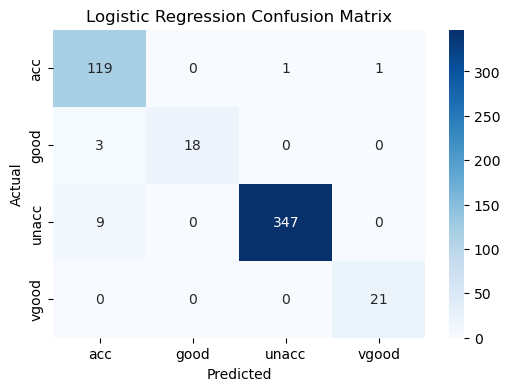

In [43]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
           xticklabels=["acc","good","unacc","vgood"],
           yticklabels=["acc","good","unacc","vgood"])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [45]:
tree_model_new = DecisionTreeClassifier(criterion="entropy",max_depth=15, max_features=None, splitter="best")

[Text(0.6140202702702703, 0.9615384615384616, 'persons <= 3.0\nentropy = 1.192\nsamples = 1208\nvalue = [263, 48, 853, 44]'),
 Text(0.6005067567567568, 0.8846153846153846, 'entropy = 0.0\nsamples = 409\nvalue = [0, 0, 409, 0]'),
 Text(0.6072635135135136, 0.9230769230769231, 'True  '),
 Text(0.6275337837837838, 0.8846153846153846, 'safety <= 0.5\nentropy = 1.473\nsamples = 799\nvalue = [263, 48, 444, 44]'),
 Text(0.620777027027027, 0.9230769230769231, '  False'),
 Text(0.6140202702702703, 0.8076923076923077, 'entropy = 0.0\nsamples = 269\nvalue = [0, 0, 269, 0]'),
 Text(0.6410472972972973, 0.8076923076923077, 'buying <= 1.5\nentropy = 1.641\nsamples = 530\nvalue = [263, 48, 175, 44]'),
 Text(0.40371621621621623, 0.7307692307692307, 'maint <= 1.5\nentropy = 1.745\nsamples = 270\nvalue = [142, 48, 36, 44]'),
 Text(0.19932432432432431, 0.6538461538461539, 'safety <= 1.5\nentropy = 1.805\nsamples = 134\nvalue = [43, 48, 8, 35]'),
 Text(0.08108108108108109, 0.5769230769230769, 'lug_boot <= 0

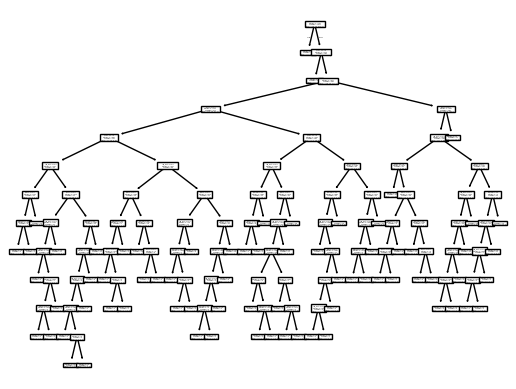

In [46]:
tree_model_new.fit(X_train_transformed, y_train)
y_pred = tree_model_new.predict(X_test_transformed)
tree.plot_tree(tree_model_new.fit(X_train_transformed, y_train),feature_names=column_names)